## Pie Charts, Box Plots, Scatter Plots, and Bubble Plots

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
mpl.style.use('ggplot')

In [4]:
print('Matplotlib version: ',mpl.__version__)

Matplotlib version:  3.7.3


In [5]:
# Dataset: Immigration to Canada from 1980 to 2013
# International migration flows to and from selected countries
# The 2015 revision from United Nation's website.

df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')
print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [6]:
df.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [7]:
df.shape

(195, 39)

In [8]:
df.set_index('Country', inplace=True)

In [9]:
df.head(3)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


In [10]:
df.shape

(195, 38)

In [11]:
# let's create a list of years from 1980 - 2013
years = list(map(str, range(1980, 2014)))

In [12]:
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

### Pie Charts

In [13]:
# group countries by continents and apply sum() function 
df_continent = df.copy()
df_continent = df_continent.drop(['Region', 'DevName'], axis=1)
df_continent = df_continent.groupby('Continent').sum()



In [14]:
df_continent.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


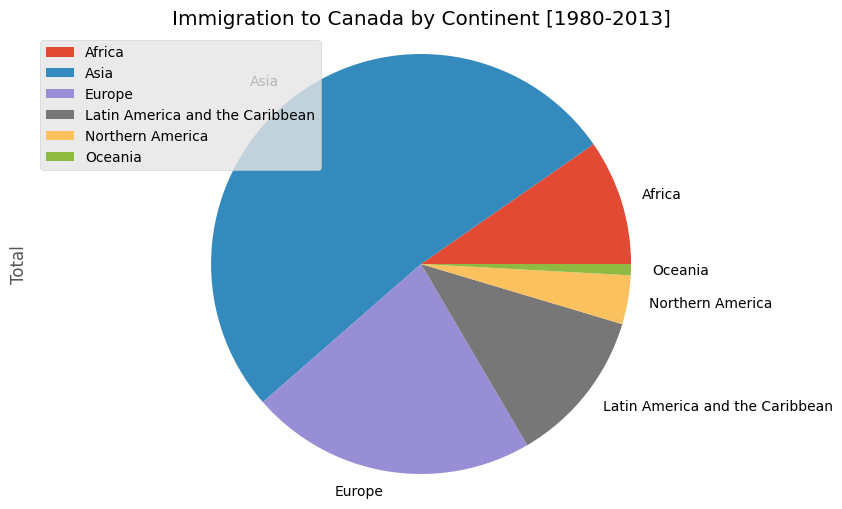

In [15]:
# 1 Pie Plot
df_continent['Total'].plot(kind='pie', figsize=(10,6))

plt.title('Immigration to Canada by Continent [1980-2013]')
plt.axis('Equal')
plt.legend(labels=df_continent.index, loc='upper left')
plt.show()

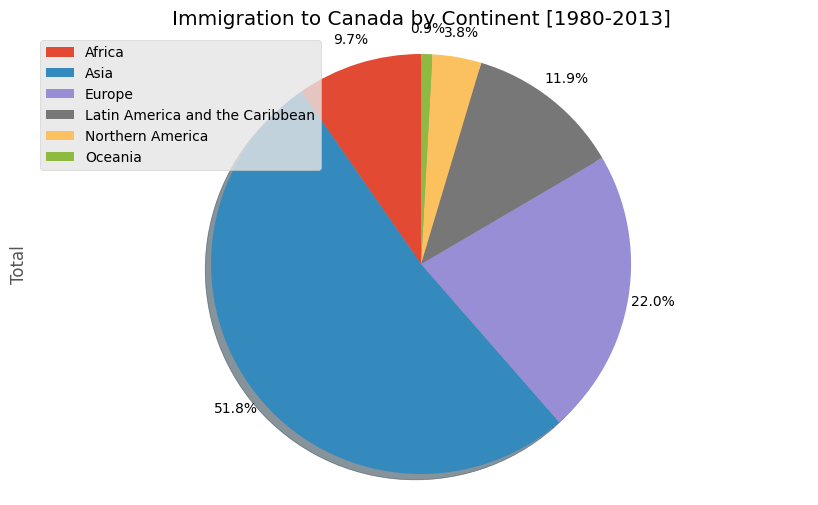

In [16]:
# 2 Pie Plot
df_continent['Total'].plot(kind='pie', figsize=(10,6), autopct='%1.1f%%',
                          startangle=90,
                          shadow=True,
                          labels=None,
                          pctdistance=1.12)

plt.title('Immigration to Canada by Continent [1980-2013]')
plt.axis('Equal')
plt.legend(labels=df_continent.index, loc='upper left')
plt.show()

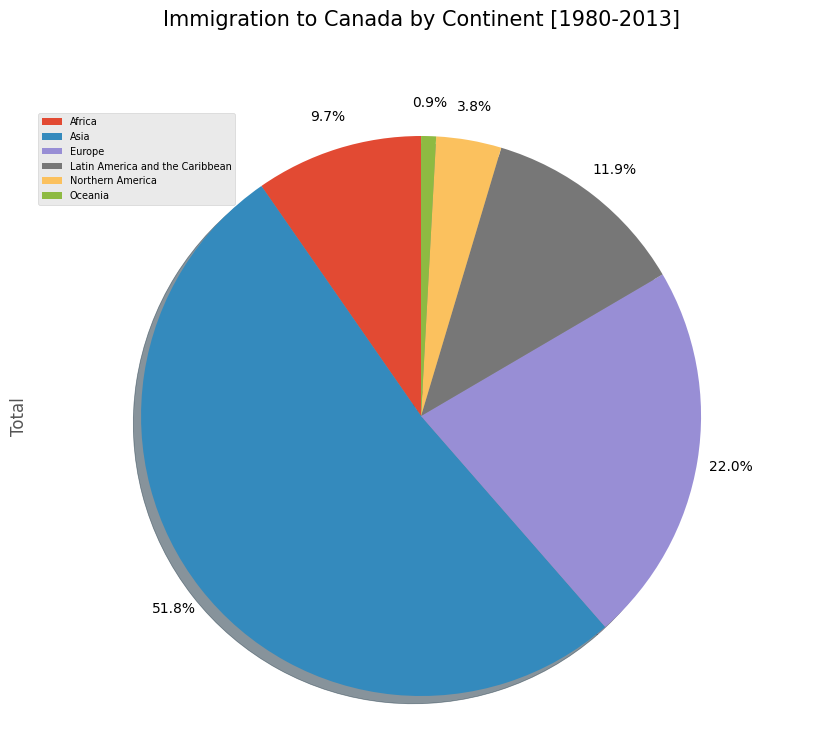

In [17]:
# 3 Pie plot
color_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen','pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1]

df_continent['Total'].plot(kind='pie', figsize=(10,8), autopct='%1.1f%%', startangle=90,
                          shadow=90, labels=None, pctdistance=1.12)

plt.title('Immigration to Canada by Continent [1980-2013]', y=1.12, fontsize=15)
plt.axis('equal')
plt.legend(labels=df_continent.index, loc='upper left', fontsize=7)
plt.show()

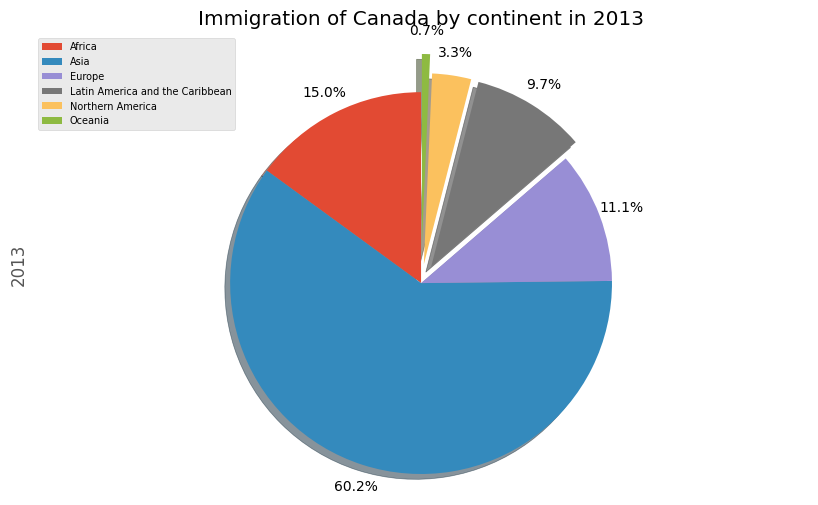

In [76]:
# Using a Pie chart explore the proportion (percentage) of new immigrants grouped by continents in the year 2013
df_continent_2013 = df_continent['2013']
explode_list = [0.0, 0, 0, 0.1, 0.1, 0.2]

df_continent_2013.plot(kind='pie', figsize=(10,6),
                      autopct = '%1.1f%%',
                      startangle=90,
                      shadow=True,
                      labels=None,
                      pctdistance=1.12,
                      explode = explode_list)
plt.title('Immigration of Canada by continent in 2013')
plt.axis('equal')
plt.legend(labels=df_continent_2013.index, loc='upper left', fontsize=7)
plt.show()

### Box Plots

A box plot is a way of statistically representing the distribution of the data through five main dimensions:

* **Minimum:** The smallest number in the dataset excluding the outliers.
* **First quartile:** Middle number between the minimum and the medium.
* **Second quartile:** (Median): Midddle number of the (sorted) dataset.
* **Third quartile:** Middle number between median and maximum
* **Maximum:** The largest number in the dataset excluding the outliers.

In [79]:
# Lets plot the box plot for the japanese immigrants between 1980-2013

df_japan = df.loc[['Japan'], years].transpose()
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


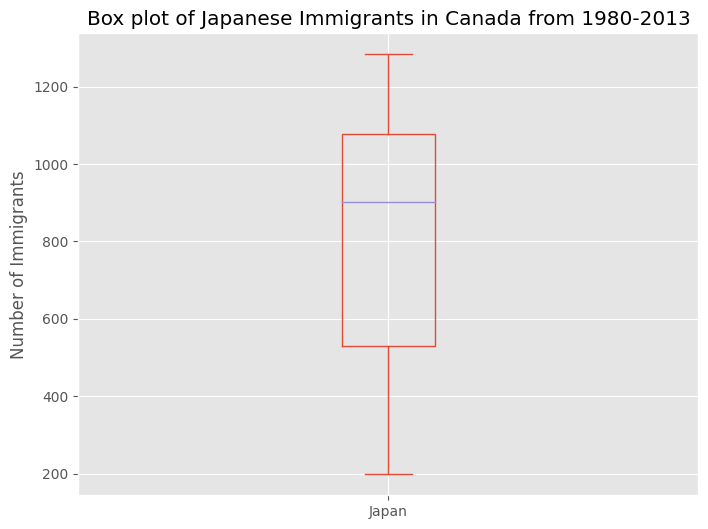

In [80]:
df_japan.plot(kind='box', figsize=(8,6))
plt.ylabel('Number of Immigrants')
plt.title('Box plot of Japanese Immigrants in Canada from 1980-2013')
plt.show()

In [81]:
# we can view the actual numbers by calling the describe() method on the dataframe

df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


In [83]:
# Compare the distribution of the number of new immgrants from India and China for the period 1980-2013

df_IC = df.loc[['India', 'China'], years].transpose()
df_IC.head()

Country,India,China
1980,8880,5123
1981,8670,6682
1982,8147,3308
1983,7338,1863
1984,5704,1527


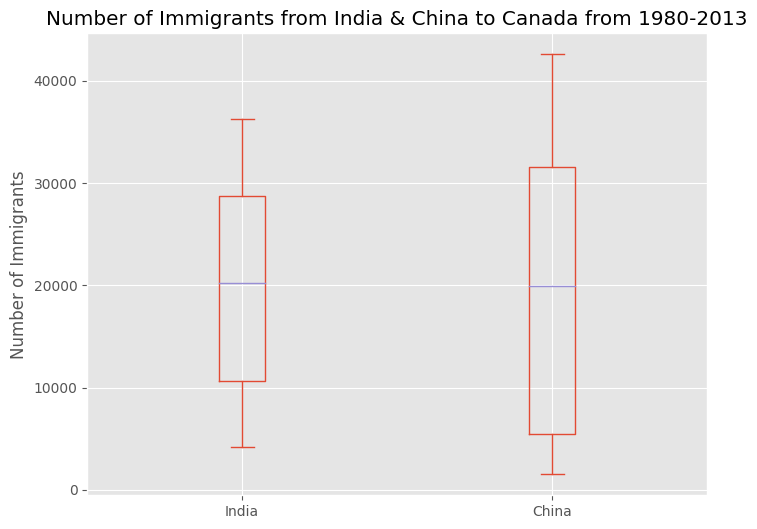

In [87]:
# Plot

df_IC.plot(kind='box', figsize=(8,6))
plt.title('Number of Immigrants from India & China to Canada from 1980-2013')
plt.ylabel('Number of Immigrants')
plt.show()

In [89]:
# Describe
df_IC.describe()

Country,India,China
count,34.000000,34.000000
mean,20350.117647,19410.647059
std,10007.342579,13568.230790
min,4211.000000,1527.000000
25%,10637.750000,5512.750000
50%,20235.000000,19945.000000
75%,28699.500000,31568.500000
max,36210.000000,42584.000000


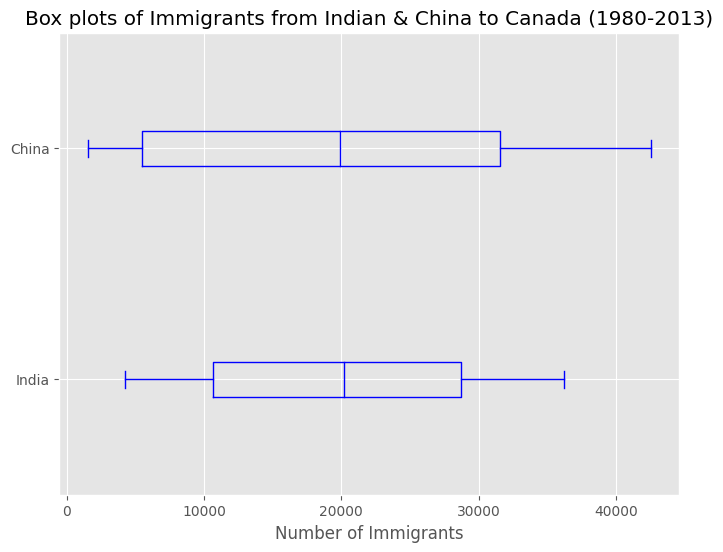

In [91]:
# Horizontal box plot

df_IC.plot(kind='box', figsize=(8,6), color='blue', vert=False)
plt.title('Box plots of Immigrants from Indian & China to Canada (1980-2013)')
plt.xlabel('Number of Immigrants')
plt.show()

### Subplot

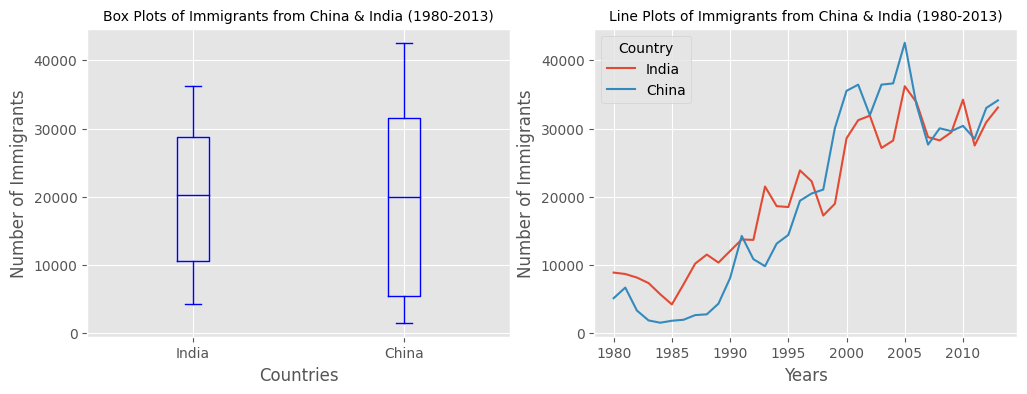

In [103]:
# Lets create subplot
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot)

# subplot 1 : Box Plot
df_IC.plot(kind='box', color='blue', figsize=(12,4), ax=ax0) # add to subplot1
ax0.set_title('Box Plots of Immigrants from China & India (1980-2013)', fontsize=10)
ax0.set_ylabel('Number of Immigrants')
ax0.set_xlabel('Countries')

# subplot 2: Lineplot
df_IC.plot(kind='line', figsize=(12,4), ax=ax1) # add to subplot2
ax1.set_title('Line Plots of Immigrants from China & India (1980-2013)', fontsize=10)
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

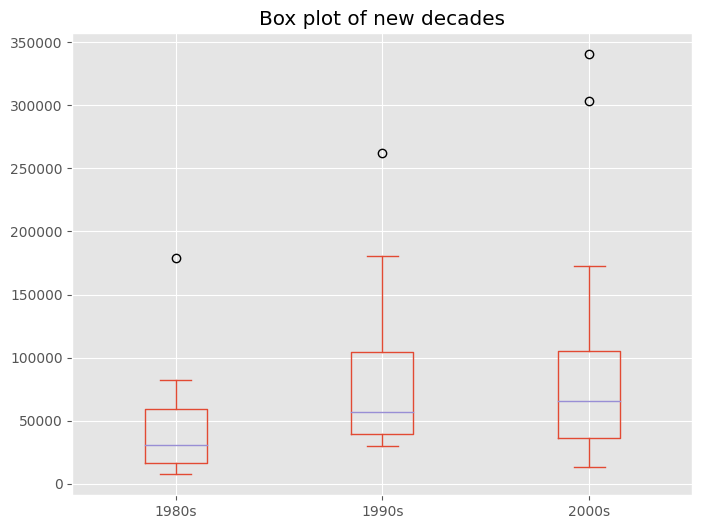

In [129]:
# Create a boxplot to visualize the distribution of the top 15 countries grouped by decades 1980s, 1990s, 2000s

df_top15 = df.copy()
df_top15 = df_top15.sort_values(['Total'], ascending = False, axis=0).head(15)

years_80s = list(map(str, range(1980, 1990)))
years_90s = list(map(str, range(1990, 2000)))
years_20s = list(map(str, range(2000, 2010)))

df_80s = df_top15.loc[:, years_80s].sum(axis=1)
df_90s = df_top15.loc[:, years_90s].sum(axis=1)
df_20s = df_top15.loc[:, years_20s].sum(axis=1)

new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s': df_20s})

new_df.plot(kind='box', figsize=(8,6))
plt.title('Box plot of new decades')
plt.show()

In [131]:
new_df.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


### Scater Plot

In [154]:
# Using a Scatter plot. lets visulize the trend of total immigrantion to Canada (all countries combined) for the years 1980-2013

df_tot = pd.DataFrame(df[years].sum(axis=0)) # we can use the sum() method to get the total population per year
df_tot.index = map(int, df_tot.index) # reset the years to type int
df_tot.reset_index(inplace=True) # reset the index to put in back as a column
df_tot.columns = ['year', 'total'] # rename columns
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


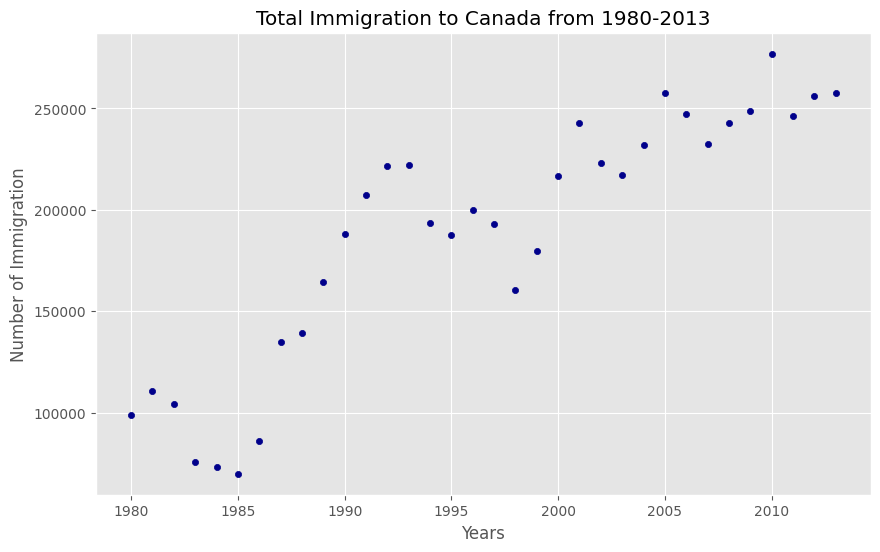

In [155]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10,6), color='darkblue')
plt.title('Total Immigration to Canada from 1980-2013')
plt.xlabel('Years')
plt.ylabel('Number of Immigration')
plt.show()

In [158]:
# Lets try to plot a linear line of best fit, and use it to predict the number of immigrants in 2015
# we will use Numpy's polyfit() method

x = df_tot['year'] 
y = df_tot['total']
fit = np.polyfit(x, y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

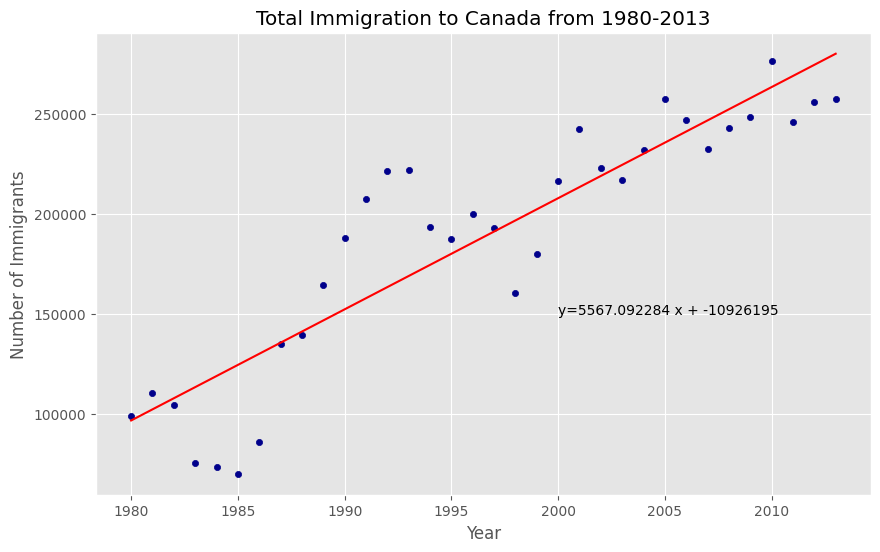

In [161]:
# plot the regression line on the scatter plot

df_tot.plot(kind='scatter', x='year', y='total', figsize=(10,6), color='darkblue')
plt.title('Total Immigration to Canada from 1980-2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0]*x + fit[1], color='red')  # recall that x is the years
plt.annotate('y={0:0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))
plt.show()

In [193]:
# create a scatter plot of the total immigration from Denmark, Norway, and Sweden only

df_DNS = df.copy()
df_DNS = df_DNS.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

df_total = pd.DataFrame(df_DNS.sum(axis=1))
df_total.reset_index(inplace=True)
df_total.columns = ['year', 'total']
df_total['year'] = df_total['year'].astype(int)
df_total.head()

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


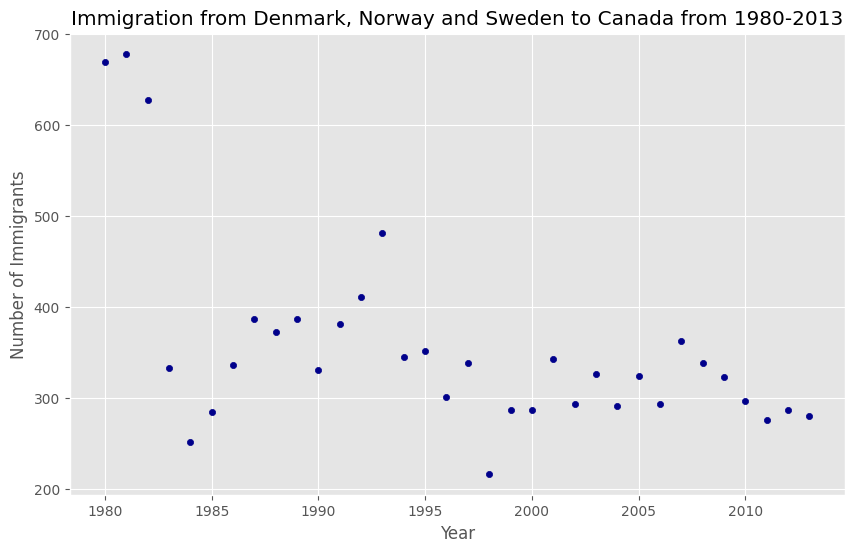

In [197]:
# plot scatterplot

df_total.plot(kind='scatter', x='year', y='total', figsize=(10,6), color='darkblue')
plt.title('Immigration from Denmark, Norway and Sweden to Canada from 1980-2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.show()

### Bubble Plot

In [230]:
# Bubble plot is a variation of scatter plot that displays three dimensions of data (x,y,z)
# Les make a bubble plot of immigration from Brazil and Argentina for the years 1980-2013

df_AB = df.loc[['Argentina', 'Brazil'], years].transpose()
df_AB.index = map(int, df_AB.index)
df_AB.index.name = 'Year'
df_AB.reset_index(inplace=True)

df_AB.head()

Country,Year,Argentina,Brazil
0,1980,368,211
1,1981,426,220
2,1982,626,192
3,1983,241,139
4,1984,237,145


In [231]:
# create the normalize weights

norm_brazil = (df_AB['Brazil'] - df_AB['Brazil'].min()) / (df_AB['Brazil'].max() - df_AB['Brazil'].min())
norm_argentina = (df_AB['Argentina'] - df_AB['Argentina'].min()) / (df_AB['Argentina'].max() - df_AB['Argentina'].min())

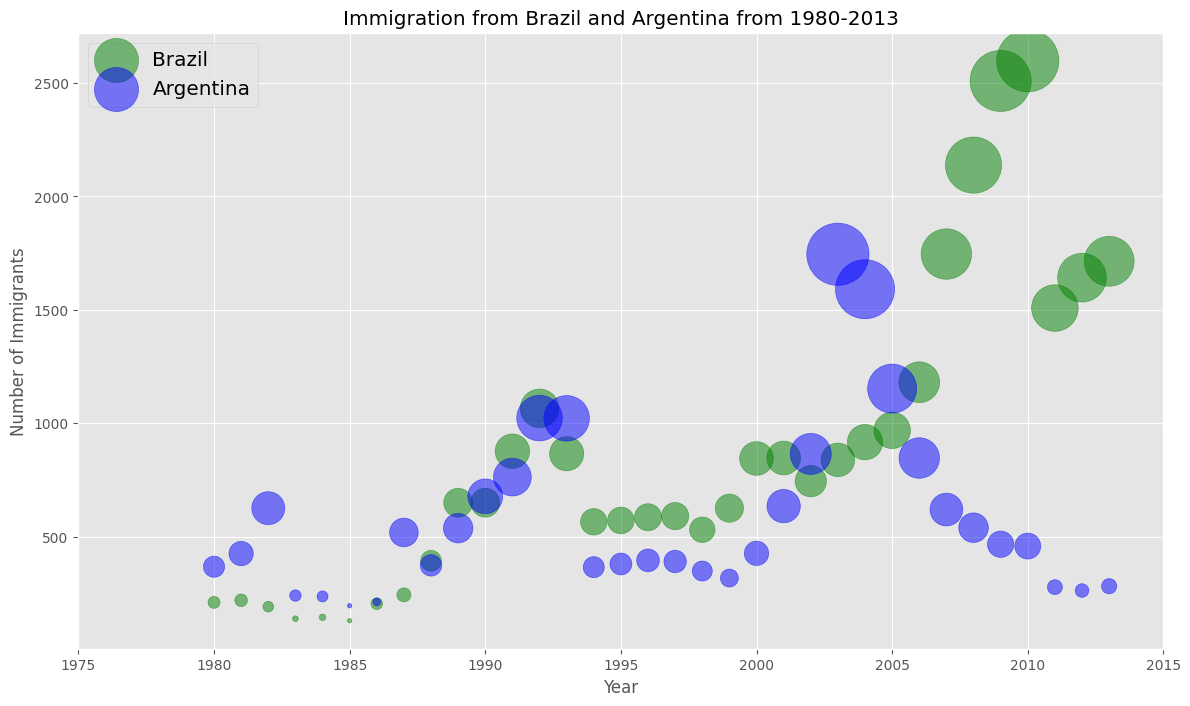

In [233]:
# plot the data
# Brazil
ax0 = df_AB.plot(kind='scatter', x='Year', y='Brazil', figsize=(14,8), alpha=0.5,
                color='green', s=norm_brazil * 2000 + 10, xlim=(1975, 2015))

# Argentina
ax1 = df_AB.plot(kind='scatter', x='Year', y='Argentina', alpha=0.5,
                color='blue', s=norm_argentina * 2000 + 10,
                ax=ax0)

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980-2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large');

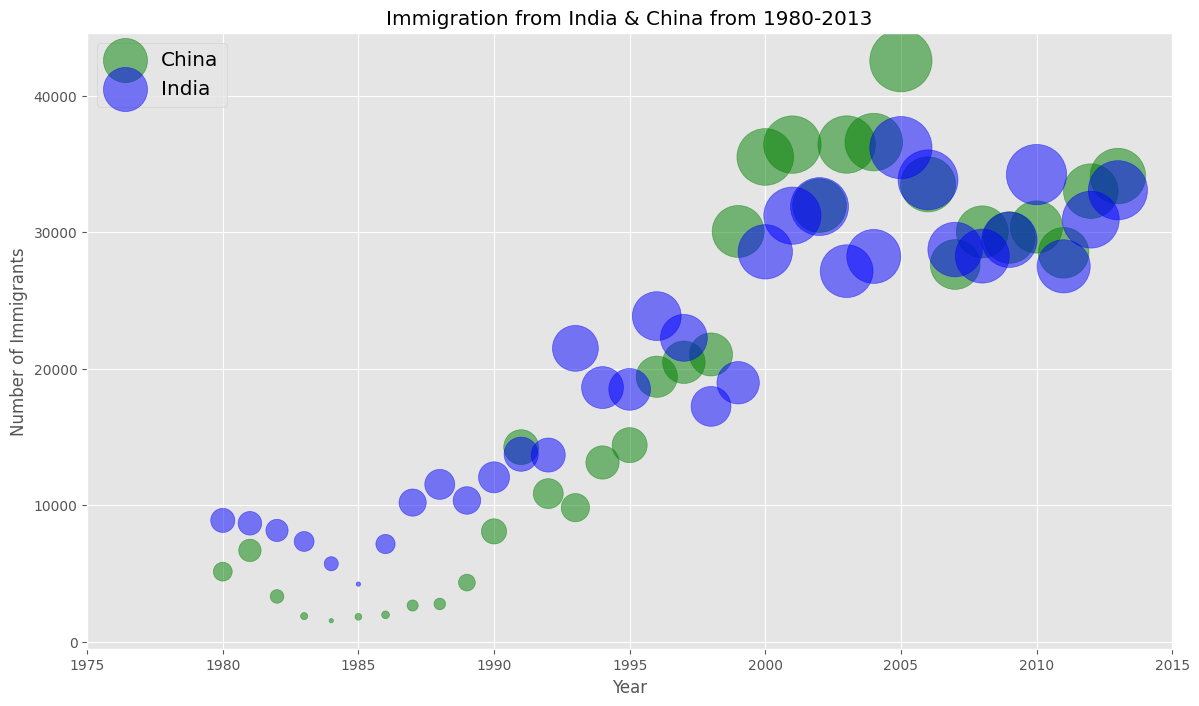

In [261]:
# Create bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013

df_CI = df.copy()
df_CI = df_CI.loc[['India', 'China'], years].transpose()
df_CI.index = map(int, df_CI.index)

df_CI.index.name = 'Year'
df_CI.reset_index(inplace=True)

# normalize_data
norm_india = (df_CI['India'] - df_CI['India'].min()) / (df_CI['India'].max() - df_CI['India'].min())
norm_china = (df_CI['China'] - df_CI['China'].min()) / (df_CI['China'].max() - df_CI['China'].min())

ax0 = df_CI.plot(kind='scatter', x='Year', y='China', figsize=(14,8), alpha=0.5, color='green', s=norm_china * 2000 + 10, xlim=(1975, 2015))
ax1 = df_CI.plot(kind='scatter', x='Year', y='India', alpha=0.5, color='blue', s=norm_india * 2000 + 10, ax = ax0)

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from India & China from 1980-2013')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')

plt.show()

### Thank you

## Author

<a href="https://www.linkedin.com/in/neeleshchidar37/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01">Neelesh Chidar</a>